# Neural Network Example

## Loading data

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
data = load_wine()
X,y=data['data'],data['target']
df = pd.DataFrame(data = np.c_[data['data'], data['target']], columns = data['feature_names']+['target'])
print('Rows: '+str(df.shape[0]))
df.head(3)

Rows: 178


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0


## Normalizing the data

In [2]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, random_state=1)

## Plotting heatmap

<AxesSubplot:>

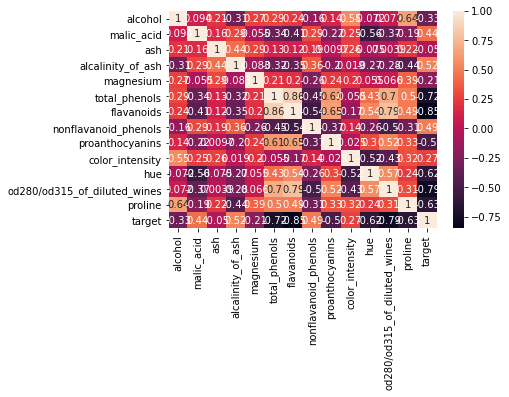

In [3]:
import seaborn as sns
corr = df[df.columns].corr()
sns.heatmap(corr, annot = True)

## Training neural network

In [5]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(solver='sgd', alpha=1e-5, activation = 'logistic', tol = 0.001, max_iter = 5000, hidden_layer_sizes=(5,5), random_state=1)
MLP.fit(X_train, y_train)
print('Training accuracy: ' + str(MLP.score(X_train, y_train)))
print('Test accuracy: ' + str(MLP.score(X_test, y_test)))

Training accuracy: 0.40601503759398494
Test accuracy: 0.37777777777777777


## Training logistic regression

In [6]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter = 5000, tol = 0.001, random_state=1).fit(X_train, y_train)
print('Training accuracy: ' + str(LR.score(X_train, y_train)))
print('Test accuracy: ' + str(LR.score(X_test, y_test)))

Training accuracy: 0.9924812030075187
Test accuracy: 0.9777777777777777
